In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [5]:
#For pre-processing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

#for creating pikle fiies
import joblib
from joblib import dump
import pickle

# For splitting data into training and testing
from sklearn.model_selection import train_test_split

# metrics for calculations
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

#various machine learning models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

#the new models
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

#for data visualization 
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix , classification_report
# for hyperParameterTuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# for creating deep learning models
from tensorflow import keras
from tensorflow.keras import layers

#for predicting the output
# from PE_file import func

In [6]:
df = pd.read_csv('data.csv', sep = '|')

In [7]:
df.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,Windows.Internal.Shell.Broker.dll,09e83f1d1c99ad33009dbe6fb129c2d9,34404,240,8226,14,12,779776,253952,0,...,2,3.072050,2.706833,3.437268,604.000000,200,1008,256,16,1
1,hidserv.dll,3030f19c6a73367d6d5eedd157f5d01a,34404,240,8226,14,12,21504,13312,0,...,3,3.056204,2.709457,3.465499,515.333333,200,932,256,16,1
2,DmApiSetExtImplDesktop.dll,8271846f8f5dd1cfddaa957b1b9da1a2,34404,240,8226,14,12,33792,27648,0,...,1,3.466474,3.466474,3.466474,980.000000,980,980,256,16,1
3,FSResizerSetup27.exe,5802b4215566bb9593a736e945a28e99,332,224,271,6,0,23552,164864,1024,...,9,3.032143,1.971335,5.102472,363.444444,34,744,0,0,1
4,asc-setup.exe,8cb1fb45489d065720285deeccbacd98,332,224,33167,2,25,87040,71680,0,...,19,4.402265,2.699131,6.600332,3275.473684,16,33512,0,15,1


## Data Analysis

In [8]:
df.columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [9]:
df.isna().sum().sum()

0

In [10]:
df.duplicated().sum()

0

In [11]:
df.nunique()

Name                           10539
md5                            10531
Machine                            2
SizeOfOptionalHeader               3
Characteristics                   53
MajorLinkerVersion                27
MinorLinkerVersion                35
SizeOfCode                      1782
SizeOfInitializedData           1656
SizeOfUninitializedData          197
AddressOfEntryPoint             4972
BaseOfCode                       188
BaseOfData                       496
ImageBase                        190
SectionAlignment                   4
FileAlignment                      5
MajorOperatingSystemVersion        7
MinorOperatingSystemVersion        5
MajorImageVersion                 18
MinorImageVersion                 29
MajorSubsystemVersion              6
MinorSubsystemVersion              5
SizeOfImage                     1084
SizeOfHeaders                      9
CheckSum                        5486
Subsystem                          4
DllCharacteristics                43
S

In [12]:
df.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,10539.000000,10539.000000,10539.000000,10539.000000,10539.000000,1.053900e+04,1.053900e+04,1.053900e+04,1.053900e+04,1.053900e+04,...,10539.000000,10539.000000,10539.000000,10539.000000,1.053900e+04,10539.000000,1.053900e+04,1.053900e+04,10539.000000,10539.000000
mean,10897.261979,228.981118,6690.892115,11.002277,8.951513,1.318032e+06,1.048309e+06,2.818828e+05,3.815470e+05,5.756487e+04,...,19.825505,3.720452,2.245625,5.488690,2.555231e+04,280.169845,2.383246e+05,1.517926e+05,11.036057,0.335895
std,15760.025794,7.525192,10279.733735,7.423987,11.159629,3.752865e+07,2.655705e+07,1.527909e+07,1.774100e+06,9.568175e+05,...,82.190732,1.015392,1.145585,1.895338,1.150441e+05,1631.936775,1.311310e+06,1.557227e+07,7.295529,0.472325
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,6.000000,0.000000,4.300800e+04,3.993600e+04,0.000000e+00,1.286000e+04,4.096000e+03,...,2.000000,3.352950,1.569330,3.661073,8.744286e+02,20.000000,9.840000e+02,0.000000e+00,0.000000,0.000000
50%,332.000000,224.000000,271.000000,14.000000,11.000000,1.658880e+05,1.628160e+05,0.000000e+00,7.164400e+04,4.096000e+03,...,6.000000,3.667685,2.434955,5.214816,2.196800e+03,104.000000,9.640000e+03,9.200000e+01,16.000000,0.000000
75%,34404.000000,240.000000,8226.000000,14.000000,12.000000,4.003840e+05,8.668160e+05,0.000000e+00,2.012160e+05,4.096000e+03,...,19.000000,4.193130,3.012886,7.544784,1.242508e+04,240.000000,8.246400e+04,2.560000e+02,16.000000,1.000000
max,34404.000000,328.000000,41358.000000,127.000000,165.000000,1.766614e+09,1.918989e+09,1.070112e+09,6.673171e+07,6.203392e+07,...,4385.000000,7.998279,7.998279,7.999994,6.189540e+06,89912.000000,6.003751e+07,1.598644e+09,21.000000,1.000000


In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 55 numerical features : ['Machine', 'SizeOfOptionalHeader', 'Characteristics', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase', 'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion', 'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion', 'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage', 'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve', 'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb', 'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy', 'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize', 'SectionsMeanVirtualsize', 'SectionsMinVirtualsize', 'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb', 'ImportsNbOrdinal', 'ExportNb', 'ResourcesNb', 'ResourcesMeanEntropy', 'ResourcesMinEntropy',

In [14]:
x =  df.drop(columns=['legitimate'],axis= 1)

In [15]:
y  =df['legitimate']

In [16]:
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

## Data Pre-Processing

In [17]:
num_pipeline= Pipeline(
                steps=[
                ("imputer",SimpleImputer(strategy="median")),
                ("scaler",StandardScaler())

                ]
            )

cat_pipeline=Pipeline(

    steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("one_hot_encoder",OneHotEncoder(handle_unknown='ignore')),
    ("scaler",StandardScaler(with_mean=False))
    ]

)

In [18]:
preprocessor=ColumnTransformer(
                [
                ("num_pipeline",num_pipeline,num_features),
                ("cat_pipelines",cat_pipeline,cat_features)

                ]


            )

In [19]:
x.shape

(10539, 56)

In [20]:
X = preprocessor.fit_transform(x)
X.shape

(10539, 21124)

In [21]:
dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

## Data splitting and modelling

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.23,random_state=42)
X_train.shape, X_test.shape

((8115, 21124), (2424, 21124))

In [23]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [25]:
model_list = []
r2_list =[]
RMSE_list = []
MAE_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    # appending the r2 score, mean absolute erroor and root mean squared error
    # RMSE_list.append(model_test_rmse)
    # MAE_list.append(model_test_mae)
    r2_list.append(model_test_r2)
    
    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1873
- Mean Absolute Error: 0.0351
- R2 Score: 0.8431


K-Neighbors Classifier
Model performance for Training set
- Root Mean Squared Error: 0.8151
- Mean Absolute Error: 0.6644
- R2 Score: -1.9802
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8142
- Mean Absolute Error: 0.6630
- R2 Score: -1.9670


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1573
- Mean Absolute Error: 0.0248
- R2 Score: 0.8892


Random Forest Classifier
Model performance for Training set
- Root Mean Squared Error: 0.0111
- Mean Absolute Error: 0.0001
- R2 Score

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [25]:
table  = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


In [26]:
table

,Model Name,R2_Score
6,XGBRegressor,0.931901
5,Random Forest Regressor,0.926957
7,CatBoosting Regressor,0.926064
4,Decision Tree,0.878146
8,AdaBoost Regressor,0.772869
0,Linear Regression,0.757323
2,Ridge,0.757318
1,Lasso,-0.000010
3,K-Neighbors Regressor,-1.966952


In [28]:
XGB_model = XGBRegressor()
XGB_model = XGB_model.fit(X_train,y_train)
y_pred = XGB_model.predict(X_test)
score  = r2_score(y_test,y_pred)*100

print(" Accuracy of the model is %.2f" %score)


 Accuracy of the model is 93.19


In [29]:
with open('model.pkl', 'wb') as f:
    pickle.dump(XGB_model, f)

In [30]:
X_test.shape

(2424, 21124)

In [31]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
518,1,0.996342,0.003658
439,1,0.606177,0.393823
7061,0,0.005621,-0.005621
8141,0,0.030058,-0.030058
8361,0,-0.008566,0.008566
...,...,...,...
8200,0,0.000900,-0.000900
4656,0,0.021299,-0.021299
9153,0,0.007209,-0.007209
6637,0,-0.001016,0.001016


In [37]:
from source_files.model_scripts.data_transformer import tranformer
transformed_data = tranformer(data)

In [38]:

predictions = XGB_model.predict(transformed_data)

In [39]:
predictions

array([0.07522122], dtype=float32)

In [34]:
predictions

array([0.07522122], dtype=float32)

## Visualization 

In [ ]:
X_axis = table['Model Name']
Y_axis = table['R2_Score']

fig, ax = plt.subplots()

ax.plot(X_axis, Y_axis, color='red', marker='o')
ax.scatter(X_axis, Y_axis, color='red')
for i, j in zip(X_axis, Y_axis):
    ax.annotate(str(round(j, 2)), xy=(i, j), xytext=(i, j+0.01), ha='center')

plt.xticks(rotation=50)
plt.title('Model Comparison for R2 Score')
plt.xlabel('Model Name')
plt.ylabel('R2 Score')

plt.show()

Text(0, 0.5, 'Predicted')

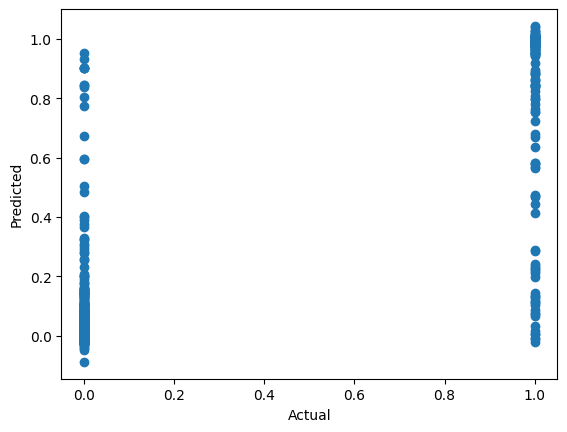

In [49]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

## HyperParameter Tuning

In [ ]:
model = RandomForestRegressor(n_estimators=200,
                               criterion='absolute_error',
                               max_features='sqrt',
                               random_state=33,
                               min_samples_leaf=20
                               ).fit(X_train,y_train)

predictions = model.predict(X_test)

# print(confusion_matrix(y_test,predictions))
# print(accuracy_score(y_test,predictions))
# print(classification_report(y_test,predictions))

In [ ]:
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, predictions)

In [ ]:
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))

- Root Mean Squared Error: 0.4777
- Mean Absolute Error: 0.2986
- R2 Score: -0.0213


In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
criterion = ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
max_features = ['sqrt','log2']
max_depth = [int(x)for x in np.linspace(10,1000,10)]
min_samples_split = [1,3,5,7,9,11]
min_samples_leaf = [3,6,9,12,15,18]

random_grid = {'n_estimators': n_estimators,
               'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
 'max_features': ['sqrt', 'log2'],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'min_samples_split': [1, 3, 5, 7, 9, 11],
 'min_samples_leaf': [3, 6, 9, 12, 15, 18]}

In [ ]:
rf = RandomForestRegressor()

rf_randomcv = RandomizedSearchCV(estimator=rf,
                                 param_distributions=random_grid,
                                 n_iter=100,
                                 cv=3,
                                 verbose=2,
                                 random_state=100,
                                 n_jobs=-1)

rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


d:\Final_Project\malware\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
54 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Final_Project\malware\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Final_Project\malware\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "d:\Final_Project\malware\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "d:\Final_Project\malware\lib\site-packag

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [3, 6, 9, 12, 15,
                                                             18],
                                        'min_samples_split': [1, 3, 5, 7, 9,
                                                              11],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [ ]:
rf_randomcv.best_params_

{'n_estimators': 400,
 'min_samples_split': 11,
 'min_samples_leaf': 12,
 'max_features': 'sqrt',
 'max_depth': 890,
 'criterion': 'poisson'}

In [ ]:
best_rg = rf_randomcv.best_estimator_

In [ ]:
pred = best_rg.predict(X_test)

In [ ]:
model_test_ma , model_test_rms, model_test_r = evaluate_model(y_test, pred)

In [ ]:
print("- Root Mean Squared Error: {:.4f}".format(model_test_ma))
print("- Mean Absolute Error: {:.4f}".format(model_test_rms))
print("- R2 Score: {:.4f}".format(model_test_r))

- Root Mean Squared Error: 0.3990
- Mean Absolute Error: 0.4228
- R2 Score: 0.2000


In [ ]:
param_grid = {
    'criterion':[rf_randomcv.best_params_['criterion']],
    'max_depth':[rf_randomcv.best_params_['max_depth']],
    'max_features':[rf_randomcv.best_params_['max_features']],
    'min_samples_leaf':[rf_randomcv.best_params_['min_samples_leaf']-4,
                        rf_randomcv.best_params_['min_samples_leaf']-2,
                        rf_randomcv.best_params_['min_samples_leaf']],
    'min_samples_split':[rf_randomcv.best_params_['min_samples_split']-4,
                         rf_randomcv.best_params_['min_samples_split']-3,
                         rf_randomcv.best_params_['min_samples_split']-2,
                         rf_randomcv.best_params_['min_samples_split']-1,
                         rf_randomcv.best_params_['min_samples_split']],
    'n_estimators':[rf_randomcv.best_params_['n_estimators']-200,
                    rf_randomcv.best_params_['n_estimators']-100,
                    rf_randomcv.best_params_['n_estimators'],
                    rf_randomcv.best_params_['n_estimators']+100,
                    rf_randomcv.best_params_['n_estimators']+200]
}

In [ ]:
param_grid

{'criterion': ['poisson'],
 'max_depth': [890],
 'max_features': ['sqrt'],
 'min_samples_leaf': [8, 10, 12],
 'min_samples_split': [7, 8, 9, 10, 11],
 'n_estimators': [200, 300, 400, 500, 600]}

In [ ]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=10,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['poisson'], 'max_depth': [890],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [8, 10, 12],
                         'min_samples_split': [7, 8, 9, 10, 11],
                         'n_estimators': [200, 300, 400, 500, 600]},
             verbose=2)

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
best_pred = best_grid.predict(X_test)
model_test_ma , model_test_rms, model_test_r = evaluate_model(y_test, best_pred)

In [ ]:
print("- Root Mean Squared Error: {:.4f}".format(model_test_ma))
print("- Mean Absolute Error: {:.4f}".format(model_test_rms))
print("- R2 Score: {:.4f}".format(model_test_r))

- Root Mean Squared Error: 0.3912
- Mean Absolute Error: 0.4145
- R2 Score: 0.2312


In [ ]:
grid_search.best_params_

{'criterion': 'poisson',
 'max_depth': 890,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 7,
 'n_estimators': 200}

## Deep learning 

In [5]:
df.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,Windows.Internal.Shell.Broker.dll,09e83f1d1c99ad33009dbe6fb129c2d9,34404,240,8226,14,12,779776,253952,0,56256,4096,0,6442450944,4096,512,10,0,10,0,10,0,1052672,1024,1064956,2,16736,262144,4096,1048576,4096,0,16,7,4.433123,2.055894,6.427080,147090.285714,1024,779776,147420.571429,752,779318,62,285,7,3,2,3.072050,2.706833,3.437268,604.000000,200,1008,256,16,1
1,hidserv.dll,3030f19c6a73367d6d5eedd157f5d01a,34404,240,8226,14,12,21504,13312,0,22816,4096,0,6442450944,4096,512,10,0,10,0,10,0,57344,1024,92847,3,16736,262144,4096,1048576,4096,0,16,7,2.736236,0.512995,6.212133,4681.142857,512,21504,4683.428571,64,21504,8,87,0,2,3,3.056204,2.709457,3.465499,515.333333,200,932,256,16,1
2,DmApiSetExtImplDesktop.dll,8271846f8f5dd1cfddaa957b1b9da1a2,34404,240,8226,14,12,33792,27648,0,32192,4096,0,6442450944,4096,512,10,0,10,0,10,0,81920,1024,99072,3,16736,262144,4096,1048576,4096,0,16,7,3.358560,1.074547,6.188118,8484.571429,512,33792,8489.857143,200,33711,32,140,0,37,1,3.466474,3.466474,3.466474,980.000000,980,980,256,16,1
3,FSResizerSetup27.exe,5802b4215566bb9593a736e945a28e99,332,224,271,6,0,23552,164864,1024,12515,4096,28672,4194304,4096,512,4,0,0,0,4,0,233472,1024,0,2,0,1048576,4096,1048576,4096,0,16,5,4.056258,0.000000,6.475519,6758.400000,0,23552,44702.800000,3840,154712,8,155,1,0,9,3.032143,1.971335,5.102472,363.444444,34,744,0,0,1
4,asc-setup.exe,8cb1fb45489d065720285deeccbacd98,332,224,33167,2,25,87040,71680,0,91076,4096,94208,4194304,4096,512,5,0,6,0,5,0,208896,1024,8921444,2,32768,1048576,16384,1048576,4096,0,16,9,2.811905,0.000000,6.466211,17635.555556,0,83968,20680.222222,8,83596,12,135,0,0,19,4.402265,2.699131,6.600332,3275.473684,16,33512,0,15,1


In [6]:
x = df.drop(columns=["legitimate"],axis=0)
y = df["legitimate"]

In [20]:
# pre-processing the data
X = preprocessor.fit_transform(x)

In [21]:
#splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.23,random_state=42)

In [22]:
#converting the data into numpy array

X_train = X_train.toarray()
y_train = y_train.to_numpy()

X_test = X_test.toarray()
y_test = y_test.to_numpy()

In [23]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1352000   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,354,113
Trainable params: 1,354,113
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
203/203 [==============================] - 7s 28ms/step - loss: 0.2806 - accuracy: 0.8937 - val_loss: 0.1842 - val_accuracy: 0.9464
Epoch 2/10
203/203 [==============================] - 6s 28ms/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.1903 - val_accuracy: 0.9384
Epoch 3/10
203/203 [==============================] - 6s 28ms/step - loss: 7.3395e-04 - accuracy: 0.9997 - val_loss: 0.1912 - val_accuracy: 0.9359
Epoch 4/10
203/203 [==============================] - 5s 25ms/step - loss: 3.7219e-04 - accuracy: 0.9998 - val_loss: 0.1925 - val_accuracy: 0.9359
Epoch 5/10
203/203 [==============================] - 5s 26ms/step - loss: 2.3268e-04 - accuracy: 1.0000 - val_loss: 0.1934 - val_accuracy: 0.9359
Epoch 6/10
203/203 [==============================] - 5s 27ms/step - loss: 1.4226e-04 - accuracy: 1.0000 - val_loss: 0.1941 - val_accuracy: 0.9359
Epoch 7/10
203/203 [==============================] - 6s 27ms/step - loss: 9.1346e-05 - accuracy: 1.0000 - val_loss: 0.1942 - 

In [25]:
model.evaluate(X_test, y_test)

76/76 [==============================] - 0s 6ms/step - loss: 0.1799 - accuracy: 0.9389


[0.1799333244562149, 0.9389439225196838]

In [26]:
results= model.predict(X_test)
results =  np.argmax(results,axis= 1)    

76/76 [==============================] - 0s 3ms/step


In [27]:
model.save("my_model.h5")